# 信号处理仿真与应用 - 测量和特征提取 - 描述性统计量

## sgolayfilt

#### 萨维茨基-戈雷滤波

**和MATLAB波形一致**

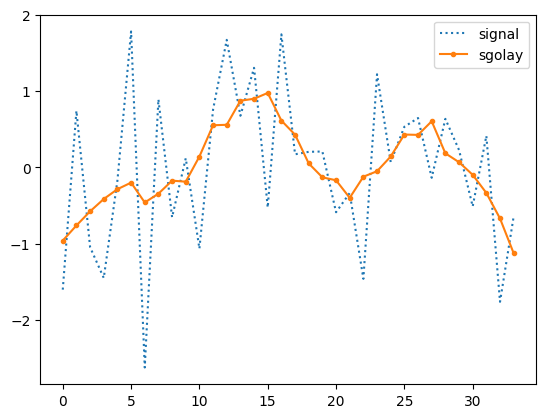

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, convolve

# 参数定义
order = 3
framelen = 11
lx = 34

# 生成随机信号
x = np.random.randn(lx)

# 使用 sgolayfilt 函数进行滤波处理
sgf = savgol_filter(x, framelen, order)

# 绘制原始信号和经过滤波处理后的信号
plt.plot(x, ':', label='signal')
plt.plot(sgf, '.-', label='sgolay')
plt.legend()
plt.show()




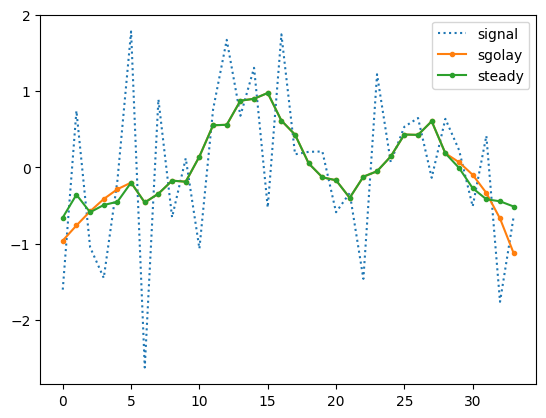

In [35]:
# 计算 steady 信号
m = (framelen - 1) // 2
B = savgol_filter(np.eye(framelen), framelen, order, axis=0)
steady = convolve(x, B[m], mode='same')

# 绘制 steady 信号
plt.plot(x, ':', label='signal')
plt.plot(sgf, '.-', label='sgolay')
plt.plot(steady, '.-', label='steady')
plt.legend()
plt.show()


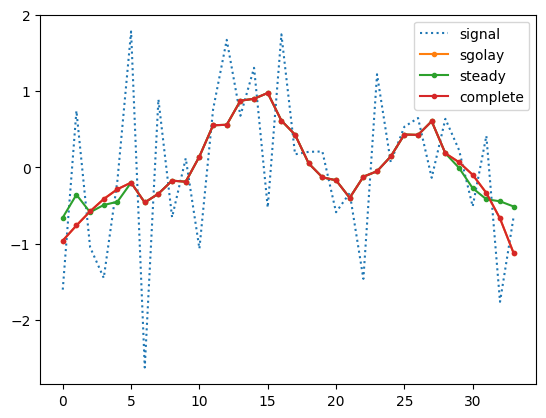

In [37]:

# 计算 complete 信号
ybeg = np.dot(B[:m], x[:framelen])
yend = np.dot(B[framelen - m:], x[lx - framelen:])
cmplt = np.copy(steady)
cmplt[:m] = ybeg
cmplt[lx - m:] = yend

# 绘制 complete 信号
plt.plot(x, ':', label='signal')
plt.plot(sgf, '.-', label='sgolay')
plt.plot(steady, '.-', label='steady')
plt.plot(cmplt, '.-', label='complete')
plt.legend()
plt.show()